# Python for finance

- https://algotrading101.com/learn/yfinance-guide/
- https://pypi.org/project/yfinance/

## General

In [33]:
# Future value
import numpy as np
import numpy_financial as npf
res = npf.fv(rate=0.08, nper=5, pmt=0, pv=-1000)
print(res)

1469.3280768000006


In [16]:
# Present value
import numpy_financial as npf
res = npf.pv(rate = 0.10, nper=8, pmt=0, fv=1000)
print(res)

-466.50738020973307


In [17]:
print(npf.fv(rate=0.10, nper=8, pmt=0, pv=-466.507))

999.9991849866707


### Monthly Loan Payments

Let's say we want to calculate how much we have to pay monthly to pay back a loan of 100,000 in 5 years. The yearly interest rate is 7%, and is calculated monthly.


In [20]:
import numpy_financial as npf

res = npf.pmt(rate=0.07/12, nper=5*12, pv=100000, fv=0) 
print(res)

-1980.1198540349467


### IRR (Internal Rate of Return)

Let's assume we invested 5000 and got the following payments back: 500, 700, 1000, 3000.

In [22]:
import numpy_financial as npf

cashflow = [-5000, 500, 700, 1000, 3000]
print(npf.irr(cashflow))

0.012164656866492818


Let's use the irr() function to compare two investment opportunities and decide which one is better.

Option 1:m
Requires 50K in investment
Will pay 10K, 25K, 25K, 35K, 42K each year for the next 5 years.

Option 2:
Requires 30K in investment
Will pay 10K, 13K, 18K, 25K, 20K each year for the next 5 years.

In [23]:
import numpy_financial as npf

cf1 = [-50000, 10000, 25000, 25000, 35000, 42000]
cf2 = [-30000, 10000, 13000, 18000, 25000, 20000]

print("Option 1: ", npf.irr(cf1))
print("Option 2: ", npf.irr(cf2)) 

Option 1:  0.3605982754620045
Option 2:  0.4094208743397143


### Plotting Data

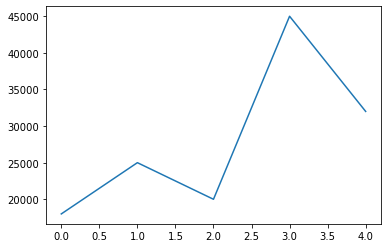

In [1]:
import matplotlib.pyplot as plt

rev = [18000, 25000, 20000, 45000, 32000]
plt.plot(rev)

10513.803224771947
0.2584333254941891


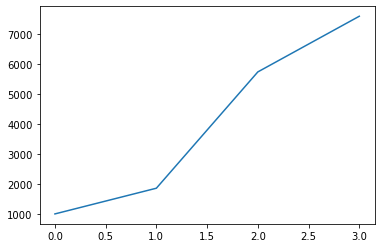

In [7]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

#price for 2018-2021
bitcoin = [3869.47, 7188.46, 22203.31, 29391.78]
print(np.std(bitcoin))

cashflow = [-500000] + list(np.array(bitcoin)*10)

#print(npf.irr(cashflow)) 

bit_num = 1000 / bitcoin[0]
print(bit_num)

inv_per_year = np.array(bitcoin) * bit_num

plt.plot(inv_per_year)

---

## Accesing Financial Data

### Web scraping

In [11]:
from urllib import request
import ssl

url="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
context = ssl._create_unverified_context()
response = request.urlopen(url, context=context)
html = response.read()

import pandas as pd
data = pd.read_html(html)

In [13]:
df = data[0]
df = df[['Symbol', 'Security']]
print(df) 

    Symbol             Security
0      MMM                   3M
1      ABT  Abbott Laboratories
2     ABBV               AbbVie
3     ABMD              Abiomed
4      ACN            Accenture
..     ...                  ...
500    YUM          Yum! Brands
501   ZBRA   Zebra Technologies
502    ZBH        Zimmer Biomet
503   ZION        Zions Bancorp
504    ZTS               Zoetis

[505 rows x 2 columns]


In [14]:
print(df[df['Security'] == 'Apple'])

   Symbol Security
44   AAPL    Apple


In [17]:
import pandas as pd
import requests

url_link = 'https://finance.yahoo.com/quote/TSLA/profile'
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})

data = pd.read_html(r.text)
print(data[0]) 

                       Name                                        Title  \
0          Mr. Elon R. Musk          Technoking of Tesla, CEO & Director   
1   Mr. Zachary J. Kirkhorn                         Master of Coin & CFO   
2     Mr. Andrew D. Baglino    Sr. VP of Powertrain & Energy Engineering   
3        Mr. Vaibhav Taneja  Corp. Controller & Chief Accounting Officer   
4         Mr. Martin Viecha          Sr. Director for Investor Relations   
5         Mr. Alan Prescott                                  VP of Legal   
6           Mr. Dave Arnold        Sr. Director of Global Communications   
7              Brian Scelfo                 Sr. Director of Corp. Devel.   
8   Mr. Jeffrey B. Straubel                                  Sr. Advisor   
9  Mr. Franz von Holzhausen                               Chief Designer   

       Pay Exercised  Year Born  
0      NaN       NaN     1972.0  
1  300.76k     4.19M     1985.0  
2  283.27k    14.86M     1981.0  
3      NaN       NaN     19

<AxesSubplot:>

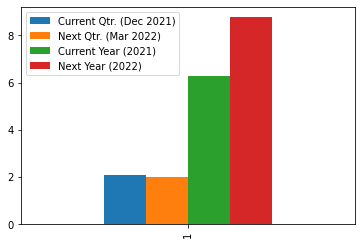

In [23]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

url_link = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})

data_0 = pd.read_html(r.text)
data = data_0[0]
data = data[data['Earnings Estimate'] == 'Avg. Estimate']

data.plot(kind='bar')


### Yahoo Finance

In [32]:
import yfinance as yf

data = yf.Ticker("TSLA")

Index(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city',
       'phone', 'state', 'country', 'companyOfficers', 'website',
       ...
       'fiftyTwoWeekLow', 'bid', 'tradeable', 'dividendYield', 'bidSize',
       'dayHigh', 'regularMarketPrice', 'preMarketPrice', 'logo_url',
       'trailingPegRatio'],
      dtype='object', length=153)


In [39]:
data.info.keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'f

In [34]:
print(data.info["returnOnEquity"])
print(data.info["profitMargins"])

0.15641
0.07403


In [41]:
import yfinance as yf

data = yf.Ticker("TSLA")

In [49]:
# show dividends
print(data.dividends)

Series([], Name: Dividends, dtype: int64)


In [44]:
# show splits
print(data.splits)

Date
2020-08-31    5.0
Name: Stock Splits, dtype: float64


In [45]:
# show balance sheet
print(data.balance_sheet)

                             2020-12-31    2019-12-31    2018-12-31  \
Intangible Assets          3.130000e+08  3.390000e+08  2.820000e+08   
Capital Surplus            2.726000e+10  1.273600e+10  1.024900e+10   
Total Liab                 2.846900e+10  2.619900e+10  2.342700e+10   
Total Stockholder Equity   2.222500e+10  6.618000e+09  4.923000e+09   
Minority Interest          1.454000e+09  1.492000e+09  1.390000e+09   
Other Current Liab         4.147000e+09  3.693000e+09  2.955000e+09   
Total Assets               5.214800e+10  3.430900e+10  2.974000e+10   
Common Stock               1.000000e+06  1.000000e+06           NaN   
Other Current Assets       2.380000e+08  2.460000e+08  1.930000e+08   
Retained Earnings         -5.399000e+09 -6.083000e+09 -5.318000e+09   
Other Liab                 3.302000e+09  2.969000e+09  2.318000e+09   
Good Will                  2.070000e+08  1.980000e+08  6.800000e+07   
Treasury Stock             3.630000e+08 -3.600000e+07 -8.000000e+06   
Other 

In [46]:
# show cashflow
print(data.cashflow)

                                             2020-12-31    2019-12-31  \
Change To Liabilities                      2.423000e+09  1.447000e+09   
Total Cashflows From Investing Activities -3.132000e+09 -1.436000e+09   
Net Borrowings                            -2.488000e+09  7.980000e+08   
Total Cash From Financing Activities       9.973000e+09  1.529000e+09   
Change To Operating Activities            -1.165000e+09 -1.000000e+09   
Issuance Of Stock                          1.268600e+10  1.111000e+09   
Net Income                                 7.210000e+08 -8.620000e+08   
Change In Cash                             1.311800e+10  2.506000e+09   
Effect Of Exchange Rate                    3.340000e+08  8.000000e+06   
Total Cash From Operating Activities       5.943000e+09  2.405000e+09   
Depreciation                               2.322000e+09  2.092000e+09   
Other Cashflows From Investing Activities  1.230000e+08  4.600000e+07   
Change To Inventory                       -4.220000

In [47]:
# show earnings
print(data.earnings)

          Revenue    Earnings
Year                         
2017  11759000000 -1962000000
2018  21461000000  -976000000
2019  24578000000  -862000000
2020  31536000000   721000000


Plot the earnings

          Revenue    Earnings
Year                         
2017  11759000000 -1962000000
2018  21461000000  -976000000
2019  24578000000  -862000000
2020  31536000000   721000000


<AxesSubplot:xlabel='Year'>

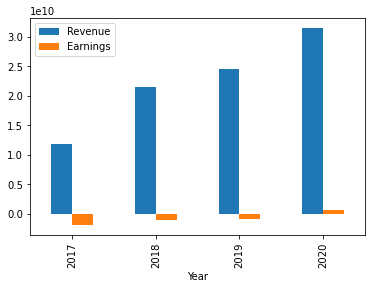

In [51]:
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.Ticker("TSLA")

x = data.earnings
print(x)

x.plot(kind="bar")


In [53]:
print(data.major_holders)

        0                                      1
0  19.96%        % of Shares Held by All Insider
1  42.40%       % of Shares Held by Institutions
2  52.98%        % of Float Held by Institutions
3    2836  Number of Institutions Holding Shares


In [54]:
print(data.institutional_holders)

                              Holder    Shares Date Reported   % Out  \
0         Vanguard Group, Inc. (The)  61992012    2021-09-29  0.0617   
1                     Blackrock Inc.  52829488    2021-09-29  0.0526   
2            Capital World Investors  37427314    2021-09-29  0.0373   
3           State Street Corporation  31230141    2021-09-29  0.0311   
4        Baillie Gifford and Company  13853124    2021-09-29  0.0138   
5      Geode Capital Management, LLC  13169939    2021-09-29  0.0131   
6            Jennison Associates LLC  10630339    2021-09-29  0.0106   
7                           FMR, LLC   9921292    2021-09-29  0.0099   
8         Northern Trust Corporation   8634516    2021-09-29  0.0086   
9  Norges Bank Investment Management   7790070    2020-12-30  0.0078   

         Value  
0  48073565465  
1  40968211354  
2  29024133460  
3  24218349742  
4  10742820599  
5  10213024295  
6   8243615287  
7   7693763520  
8   6695894467  
9   5497218696  


Recommendations

In [55]:
import yfinance as yf

data = yf.Ticker("TSLA")

x = data.recommendations
x = x[x.index > '2021-06-01']
print(x)

                                    Firm        To Grade From Grade Action
Date                                                                      
2021-06-14 13:55:22    Canaccord Genuity             Buy              main
2021-06-29 11:29:11                  UBS         Neutral              main
2021-07-07 14:52:52            JP Morgan     Underweight              main
2021-07-27 10:54:46               Mizuho             Buy              main
2021-07-27 11:48:23          Wells Fargo    Equal-Weight              main
2021-07-27 11:51:22          RBC Capital  Sector Perform              main
2021-07-27 13:38:59        Goldman Sachs             Buy              main
2021-07-27 14:27:49    Canaccord Genuity             Buy              main
2021-07-29 10:14:50              DZ Bank             Buy       Sell     up
2021-08-02 15:55:02       KGI Securities      Outperform              init
2021-08-09 09:17:02            Jefferies             Buy       Hold     up
2021-09-23 12:18:35      

Return on Equity function

In [57]:
import yfinance as yf

def RoE(ticker):
    data = yf.Ticker(ticker)
    roe = data.info['returnOnEquity']
    name = data.info['shortName']
    print(name, ":", roe)

RoE('AAPL')
RoE('MSFT')

Apple Inc. : 1.47443
Microsoft Corporation : 0.49303


History

In [59]:
data = yf.Ticker('TSLA')
print(data.history()) #Just last month

                   Open         High          Low        Close    Volume  \
Date                                                                       
2021-12-06  1001.510010  1021.640015   950.500000  1009.010010  27221000   
2021-12-07  1044.199951  1057.670044  1026.810059  1051.750000  18694900   
2021-12-08  1052.709961  1072.380005  1033.000000  1068.959961  13968800   
2021-12-09  1060.640015  1062.489990  1002.359985  1003.799988  19812800   
2021-12-10  1008.750000  1020.979980   982.530029  1017.030029  19855000   
2021-12-13  1001.090027  1005.000000   951.419983   966.409973  26198500   
2021-12-14   945.000000   966.409973   930.000000   958.510010  23602100   
2021-12-15   953.210022   978.750000   928.250000   975.989990  25056400   
2021-12-16   994.500000   994.979980   921.849976   926.919983  27590500   
2021-12-17   914.770020   960.659973   909.039978   932.570007  33479100   
2021-12-20   910.700012   921.690002   893.390015   899.940002  18826700   
2021-12-21  

In [60]:
import yfinance as yf

data = yf.Ticker('TSLA')

print(data.history(period='5d'))

                   Open         High          Low        Close    Volume  \
Date                                                                       
2021-12-30  1061.329956  1095.550049  1053.150024  1070.339966  15680300   
2021-12-31  1073.439941  1082.000000  1054.589966  1056.780029  13528700   
2022-01-03  1147.750000  1201.069946  1136.040039  1199.780029  34643800   
2022-01-04  1189.550049  1208.000000  1123.050049  1149.589966  33416100   
2022-01-05  1146.650024  1170.339966  1081.010132  1088.119995  26706559   

            Dividends  Stock Splits  
Date                                 
2021-12-30          0             0  
2021-12-31          0             0  
2022-01-03          0             0  
2022-01-04          0             0  
2022-01-05          0             0  


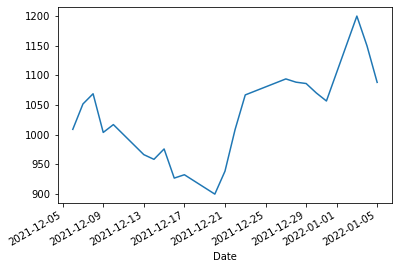

In [64]:
# Close price

data = yf.Ticker('TSLA')

x = data.history()['Close']
x.plot()

plt.savefig('plot.png')

[*********************100%***********************]  3 of 3 completed
                  AAPL        MSFT         TSLA
Date                                           
2021-01-04  129.410004  217.690002   729.770020
2021-01-05  131.009995  217.899994   735.109985
2021-01-06  126.599998  212.250000   755.979980
2021-01-07  130.919998  218.289993   816.039978
2021-01-08  132.050003  219.619995   880.020020
...                ...         ...          ...
2021-12-30  178.199997  339.320007  1070.339966
2021-12-31  177.570007  336.320007  1056.780029
2022-01-03  182.009995  334.750000  1199.780029
2022-01-04  179.699997  329.010010  1149.589966
2022-01-05  174.919998  316.380005  1088.119995

[255 rows x 3 columns]


<AxesSubplot:xlabel='Date'>

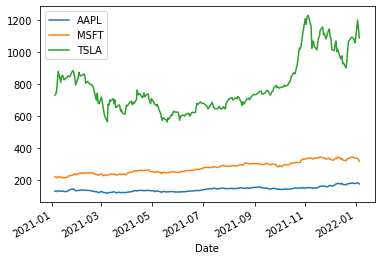

In [67]:
# Download multiple historical prices files

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 
print(data['Close'])

data["Close"].plot()

---
## Analyzing financial data

In [64]:
# Calculates the percentage between the current element and the prior one

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

data = yf.Ticker('TSLA')
price = data.history(period='1y')

x = price['Close'].pct_change()

price_diff = pd.merge(price["Close"],x, left_index=True, right_index=True)
price_diff.columns = ["Close","Pct Change"]
price_diff


,Close,Pct Change
Date,,
2021-01-07,816.039978,NaN
2021-01-08,880.020020,0.078403
2021-01-11,811.190002,-0.078214
2021-01-12,849.440002,0.047153
2021-01-13,854.409973,0.005851
...,...,...
2021-12-31,1056.780029,-0.012669
2022-01-03,1199.780029,0.135317
2022-01-04,1149.589966,-0.041833


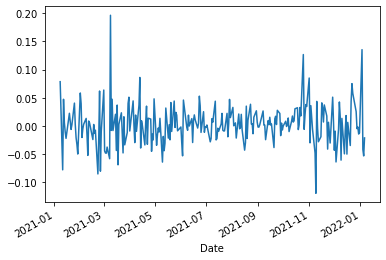

In [65]:
# Plot for daily returns

data = yf.Ticker('TSLA')
price = data.history(period='1y')

x = price['Close'].pct_change()
x.plot()


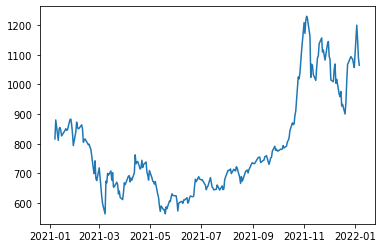

In [74]:
plt.plot(price["Close"])

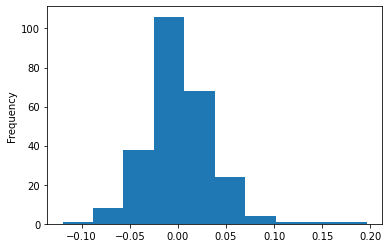

In [66]:
# Plot an histogram

data = yf.Ticker('TSLA')
price = data.history(period='1y')

x = price['Close'].pct_change()

x.plot(kind='hist')

plt.savefig('plot.png')

After understanding how the returns are distributed, we can calculate the returns from an investment.
For that, we need to calculate the cumulative returns, which can be done using the cumprod() function (The plot shows how a $1 investment would grow.)

<AxesSubplot:xlabel='Date'>

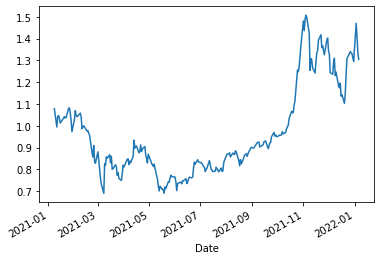

In [68]:
data = yf.Ticker('TSLA')
price = data.history(period='1y')

x = price['Close'].pct_change()

returns = (x + 1).cumprod() #1 USD invested

returns.plot()

In [98]:
# Multiple stocks

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 
x = data['Close'].pct_change()

print(x) 

[*********************100%***********************]  3 of 3 completed
                AAPL      MSFT      TSLA
Date                                    
2021-01-04       NaN       NaN       NaN
2021-01-05  0.012364  0.000965  0.007317
2021-01-06 -0.033662 -0.025929  0.028390
2021-01-07  0.034123  0.028457  0.079447
2021-01-08  0.008631  0.006093  0.078403
...              ...       ...       ...
2021-12-31 -0.003535 -0.008841 -0.012669
2022-01-03  0.025004 -0.004668  0.135317
2022-01-04 -0.012692 -0.017147 -0.041833
2022-01-05 -0.026600 -0.038388 -0.053471
2022-01-06 -0.016693 -0.007902 -0.021523

[256 rows x 3 columns]


In [99]:
# Use describe

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 

x = data['Close'].pct_change()

print(x.describe()) 

[*********************100%***********************]  3 of 3 completed
             AAPL        MSFT        TSLA
count  255.000000  255.000000  255.000000
mean     0.001242    0.001526    0.002101
std      0.015869    0.013417    0.035547
min     -0.041674   -0.038388   -0.119903
25%     -0.007731   -0.005608   -0.016969
50%      0.001410    0.000235    0.001663
75%      0.012455    0.010251    0.019100
max      0.053851    0.042114    0.196412


[*********************100%***********************]  3 of 3 completed


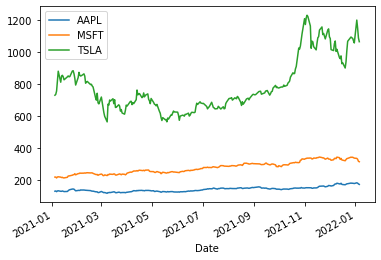

In [100]:
# Plots

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 

data['Close'].plot()

plt.savefig('plot.png') 

[*********************100%***********************]  3 of 3 completed


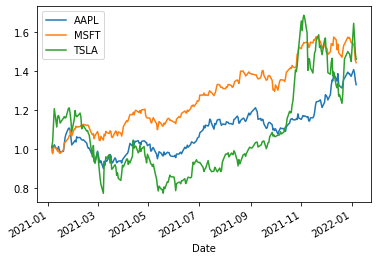

In [102]:
# Cumulative returns

data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 

x = data['Close'].pct_change()
(x + 1).cumprod().plot()

plt.savefig('plot.png')


### Correlations

In finance, correlation is a statistic that measures the degree to which two securities move in relation to each other.

We can easily calculate the correlations between stocks in Python, with the corr() function.

In [103]:
data = yf.download("FB AMZN AAPL NFLX GOOG", start='2020-01-01') 
x = data['Close'].pct_change()
corr = x.corr()
print(corr) 

[*********************100%***********************]  5 of 5 completed
          AAPL      AMZN        FB      GOOG      NFLX
AAPL  1.000000  0.671929  0.695298  0.698003  0.516268
AMZN  0.671929  1.000000  0.632091  0.652028  0.610191
FB    0.695298  0.632091  1.000000  0.736891  0.523232
GOOG  0.698003  0.652028  0.736891  1.000000  0.508209
NFLX  0.516268  0.610191  0.523232  0.508209  1.000000


[*********************100%***********************]  5 of 5 completed


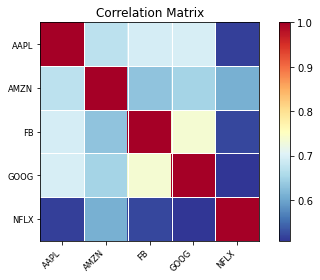

In [104]:
import statsmodels.api as sm

data = yf.download("FB AMZN AAPL NFLX GOOG", start='2020-01-01') 
x = data['Close'].pct_change()
corr = x.corr()

sm.graphics.plot_corr(corr, xnames=list(x.columns))

plt.savefig('plot.png')

### Analyzing a portafolio

In [111]:
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]

data = yf.download(stocks, start='2021-01-01')

#daily returns
x = data['Close'].pct_change()
x.head()


[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,MSFT,TSLA
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.010004,0.000965,0.007317
2021-01-06,-0.033662,-0.024897,-0.025929,0.028390
2021-01-07,0.034123,0.007577,0.028457,0.079447
2021-01-08,0.008631,0.006496,0.006093,0.078403


In [116]:
#portfolio return
ret = (x * weights).sum(axis = 1)
print(ret)

Date
2021-01-04    0.000000
2021-01-05    0.006828
2021-01-06   -0.022610
2021-01-07    0.031080
2021-01-08    0.014166
                ...   
2021-12-31   -0.008150
2022-01-03    0.023589
2022-01-04   -0.018233
2022-01-05   -0.032461
2022-01-06   -0.011663
Length: 256, dtype: float64


In [117]:
#total cumulative returns for our portfolio
cumulative = (ret + 1).cumprod() 

print(cumulative)

Date
2021-01-04    1.000000
2021-01-05    1.006828
2021-01-06    0.984063
2021-01-07    1.014647
2021-01-08    1.029021
                ...   
2021-12-31    1.392798
2022-01-03    1.425653
2022-01-04    1.399660
2022-01-05    1.354226
2022-01-06    1.338431
Length: 256, dtype: float64


<AxesSubplot:xlabel='Date'>

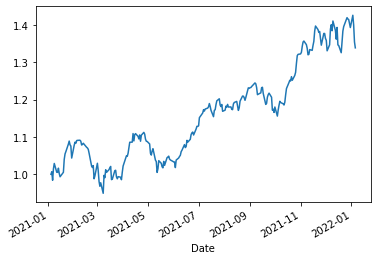

In [118]:
cumulative.plot()

In [119]:
# Calculate volatility (std)
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]

data = yf.download(stocks, start='2021-01-01')

#daily returns
x = data['Close'].pct_change()

#portfolio return
ret = (x * weights).sum(axis = 1)

print(np.std(ret))

[*********************100%***********************]  4 of 4 completed
0.01348047455814498


In [120]:
# Annual volatility

annual_std = np.std(ret) * np.sqrt(252)
print(annual_std)

0.21399589941590966


### Sharpe ratio

Another important metric is the Sharpe ratio.
Sharpe ratio is the measure of the risk-adjusted return of a portfolio. A portfolio with a higher Sharpe ratio is considered better.

To calculate the Sharpe ratio, we need to take the average return and divide it by the volatility.

```- Sharpe ratios greater than 1 are considered optimal.```


In [125]:
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]

data = yf.download(stocks, start='2021-01-01')

#daily returns
x = data['Close'].pct_change()

#portfolio return
ret = (x * weights).sum(axis = 1)
annual_std = np.std(ret) * np.sqrt(252)
sharpe = (np.mean(ret) / np.std(ret))  *  np.sqrt(252)

print(sharpe)

[*********************100%***********************]  4 of 4 completed
1.4486671162213183


### Portafolio Optimization

In [138]:
# Get daily returns

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

print(x)

[*********************100%***********************]  4 of 4 completed
                AAPL      AMZN      MSFT      TSLA
Date                                              
2018-01-02       NaN       NaN       NaN       NaN
2018-01-03 -0.000174  0.012775  0.004654 -0.010233
2018-01-04  0.004645  0.004476  0.008801 -0.008290
2018-01-05  0.011385  0.016163  0.012398  0.006230
2018-01-08 -0.003714  0.014425  0.001020  0.062638
...              ...       ...       ...       ...
2021-12-31 -0.003535 -0.011429 -0.008841 -0.012669
2022-01-03  0.025004  0.022118 -0.004668  0.135317
2022-01-04 -0.012692 -0.016916 -0.017147 -0.041833
2022-01-05 -0.026600 -0.018893 -0.038388 -0.053471
2022-01-06 -0.016693 -0.006711 -0.007902 -0.021523

[1012 rows x 4 columns]


In [143]:
# Generate random weights

wts = np.random.uniform(size = 4)
print(wts)

# To normalize
wts = wts/np.sum(wts) 

print(wts)

[0.21842216 0.95578151 0.36670081 0.01695712]
[0.1402064  0.61352145 0.23538728 0.01088487]


In [147]:
# Complete code

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

count = 500
for k in range(0, count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean() * wts).sum()*252
    p_returns.append(mean_ret)

    #volatility
    ret = (x * wts).sum(axis = 1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)


max_ind = np.argmax(p_sharpe)

#Max Sharpe ratio
print(p_sharpe[max_ind])

#weights
print(p_weights[max_ind])

[*********************100%***********************]  4 of 4 completed
1.5847091431228828
[0.25077232 0.02093453 0.38884198 0.33945116]


<AxesSubplot:>

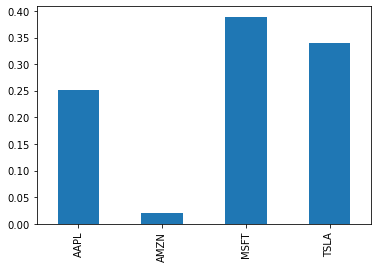

In [148]:
max_ind = np.argmax(p_sharpe)

s = pd.Series(p_weights[max_ind], index=x.columns)
s.plot(kind='bar')

We found the best portfolio weights!
As a last step, let's plot all the 500 portfolios.
The chart is called Efficient Frontier and shows the returns on the Y-axis and volatility on the X-axis.

We can create the chart using the scatter() function, providing the volatility and return lists as parameters:

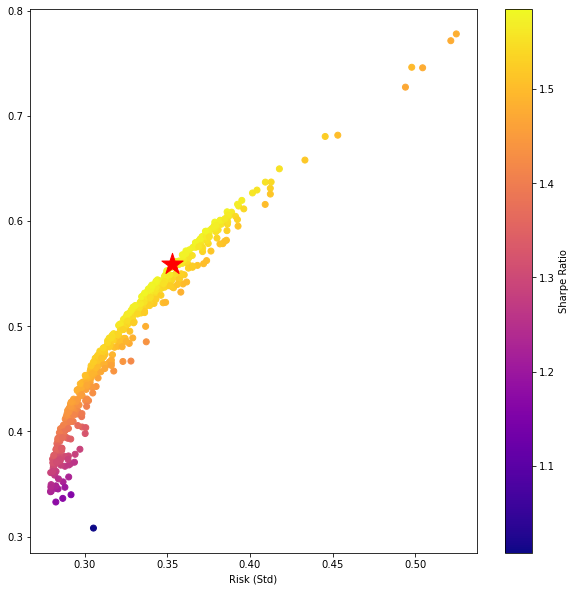

In [154]:
max_ind = np.argmax(p_sharpe)
plt.figure(figsize=(10, 10))
plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel("Risk (Std)")

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.show()

---

## Repo


0.2584333254941891
Annual volatility: 0.6566833772926033
Sharpe: 0.4163305804470411


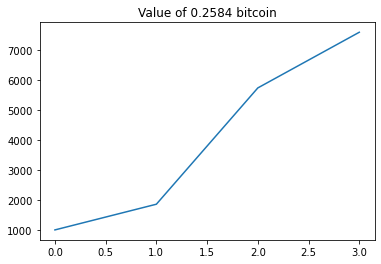

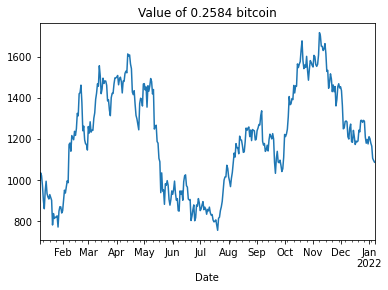

In [136]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import yfinance as yf

#price for 2018-2021
bitcoin = [3869.47, 7188.46, 22203.31, 29391.78]
#print(np.std(bitcoin))

cashflow = [-500000] + list(np.array(bitcoin)*10)

#print(npf.irr(cashflow)) 

# Suppose we have 1000 dolars to invest in bitcoin 
bit_num = 1000 / bitcoin[0]

print(bit_num) #We have 0.2584 from a bitcoin

inv_per_year = np.array(bitcoin) * bit_num

title = f"Value of {0.2584} bitcoin"
plt.title(title)
plt.plot(inv_per_year)


plt.figure()
data = yf.Ticker('BTC-USD')
BTC = data.history("1y")["Close"]
bit_num2 = 1000 / BTC[0]
plt.title(title)
(BTC*bit_num2).plot()

# Volatility

daily_return = BTC.pct_change()

daily_volatility = np.std(daily_return)
annual_volatility = daily_volatility * np.sqrt(252)
print("Annual volatility:",annual_volatility)

sharpe =  (np.mean(daily_return) / np.std(daily_return)) * np.sqrt(252)
print("Sharpe:",sharpe)
